# Descenso del Gradiente con Python y NumPy

En este cuaderno, implementaremos el algoritmo de descenso de gradiente desde cero para un modelo de regresión lineal simple. Utilizaremos la biblioteca NumPy para los cálculos numéricos y Matplotlib para la visualización. El objetivo es encontrar el peso (pendiente) y el sesgo (intersección) óptimos que minimicen el error cuadrático medio (MSE) para predecir la cantidad de libros leídos en función de las horas dedicadas a la lectura.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

## 1. Cargar y Visualizar los Datos

Primero, cargaremos los datos desde el archivo `data_libros.csv` y los visualizaremos para comprender la relación entre las horas de lectura y los libros leídos.

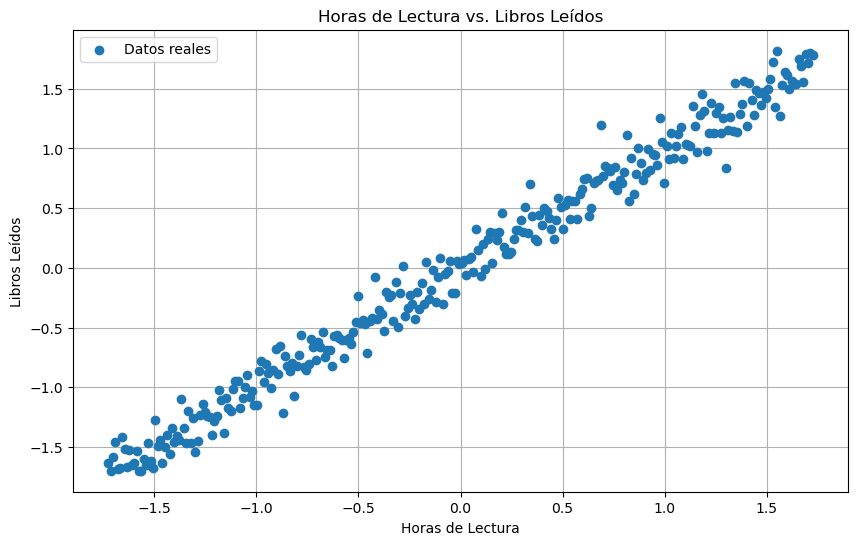

In [9]:
# Cargar los datos
df = pd.read_csv("../../data/raw/data_libros.csv")

# Extraer las características (X) y la etiqueta (y)
X = df['HoursSpentReading'].values
y = df['BooksRead'].values


# Estandarizar los datos
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X.reshape(-1, 1))
y = scaler_y.fit_transform(y.reshape(-1, 1))


# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Datos reales', zorder=2)
plt.title('Horas de Lectura vs. Libros Leídos')
plt.xlabel('Horas de Lectura')
plt.ylabel('Libros Leídos')
plt.legend()
plt.grid(True, zorder=0)
plt.show()

## 2. Inicialización de Parámetros

Inicializaremos el peso `w` y el sesgo `b` en cero. También definiremos la tasa de aprendizaje `alpha` y el número de iteraciones (épocas) para el descenso del gradiente.

In [27]:
# Inicializar parámetros
w = 0.0
b = 0.0

# Hiperparámetros
learning_rate = 0.1
epochs = 50
n = len(X)

## 3. Implementación del Descenso del Gradiente

Ahora, implementaremos el bucle del descenso del gradiente. En cada iteración, calcularemos las predicciones, el error, los gradientes del peso y el sesgo, y actualizaremos los parámetros.

La función de costo (Error Cuadrático Medio - MSE) es:
$$ J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wX_i + b))^2 $$

Las derivadas parciales (gradientes) con respecto a `w` y `b` son:
$$ \frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} X_i(y_i - (wX_i + b)) $$
$$ \frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (wX_i + b)) $$

Las reglas de actualización son:
$$ w = w - \alpha \frac{\partial J}{\partial w} $$
$$ b = b - \alpha \frac{\partial J}{\partial b} $$

In [28]:
# Listas para almacenar el historial de costos y parámetros
cost_history = []
w_history = []
b_history = []

# Bucle de descenso del gradiente
for i in range(epochs):
    # 1. Calcular la predicción del modelo
    y_pred = w * X + b
    
    # 2. Calcular el costo (MSE)
    cost = (1/n) * np.sum((y_pred - y)**2)
    cost_history.append(cost)
    
    # 3. Calcular los gradientes
    dw = (2/n) * np.sum((y_pred - y) * X)
    db = (2/n) * np.sum(y_pred - y)
    
    # 4. Actualizar los parámetros
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    # Guardar historial de parámetros
    w_history.append(w)
    b_history.append(b)
    
    # Imprimir el progreso cada 100 épocas
    if (i+1) % 100 == 0:
        print(f'Época {i+1}/{epochs}, Costo: {cost:.4f}, w: {w:.4f}, b: {b:.4f}')

print('\nEntrenamiento finalizado.')
print(f'Peso final (w): {w:.4f}')
print(f'Sesgo final (b): {b:.4f}')


Entrenamiento finalizado.
Peso final (w): 0.9912
Sesgo final (b): -0.0000


In [23]:
# Calcular los valores reales de w y b
w_real = (scaler_y.scale_[0] / scaler_x.scale_[0]) * w
b_real = scaler_y.scale_[0] * b + scaler_y.mean_[0] - w_real * scaler_x.mean_[0]
print(f'Peso real: {w_real:.2f}, Sesgo real: {b_real:.2f}')

Peso real: 0.25, Sesgo real: 0.03


## 4. Visualización de Resultados

Ahora, visualizaremos los resultados del entrenamiento.

### Gráfico de la Función de Costo

Este gráfico muestra cómo el costo (MSE) disminuyó a lo largo de las épocas. Una curva descendente indica que el modelo está aprendiendo y convergiendo hacia una solución óptima.

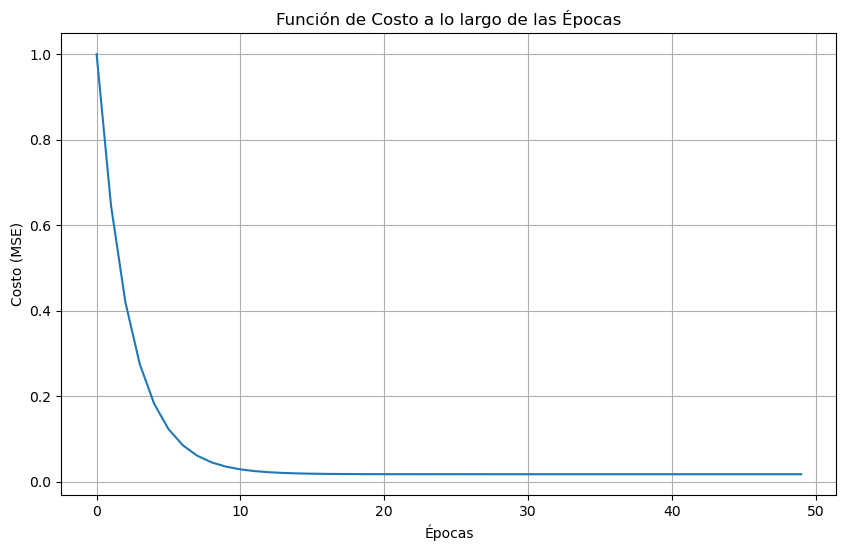

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history)
plt.title('Función de Costo a lo largo de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.grid(True)
plt.show()

### Línea de Regresión Final

Finalmente, trazaremos la línea de regresión obtenida con los valores finales de `w` y `b` sobre los datos originales para ver qué tan bien se ajusta nuestro modelo.

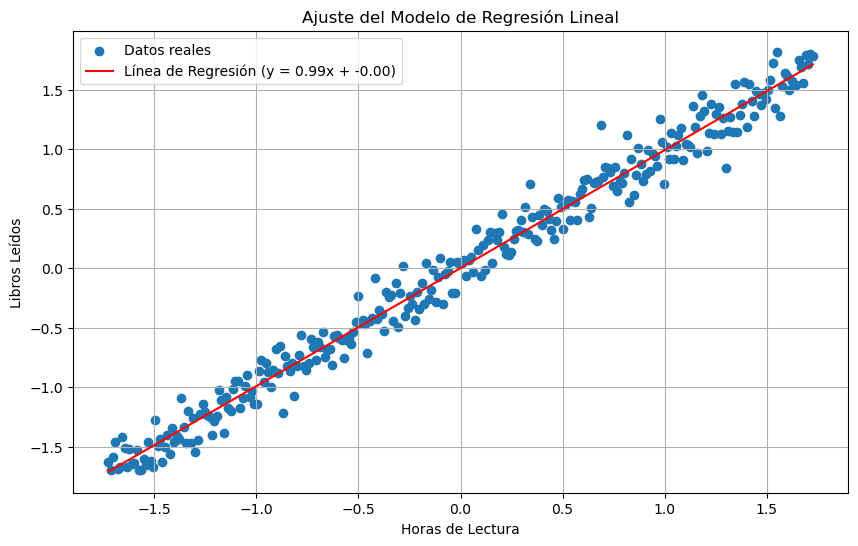

In [30]:
# Generar la línea de regresión
regression_line = w * X + b

# Visualizar la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Datos reales')
plt.plot(X, regression_line, color='red', label=f'Línea de Regresión (y = {w:.2f}x + {b:.2f})')
plt.title('Ajuste del Modelo de Regresión Lineal')
plt.xlabel('Horas de Lectura')
plt.ylabel('Libros Leídos')
plt.legend()
plt.grid(True)
plt.show()